## Pose region

In [1]:
import cv2 as cv 
import numpy as np
import scipy
import PIL.Image
import math
import time
import matplotlib
%matplotlib inline
import pylab as plt
from generateLabelCPM import *
from modelCPM import *
import mxnet.gluon as gluon
import mxnet as mx
from bbox_transform import *

## Load symbol

In [2]:
def PoseModel_test():
   
    data = mx.symbol.Variable(name='data')
    conv1_1 = mx.symbol.Convolution(name='conv1_1', data=data , num_filter=64, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu1_1 = mx.symbol.Activation(name='relu1_1', data=conv1_1 , act_type='relu')
    conv1_2 = mx.symbol.Convolution(name='conv1_2', data=relu1_1 , num_filter=64, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu1_2 = mx.symbol.Activation(name='relu1_2', data=conv1_2 , act_type='relu')
    pool1_stage1 = mx.symbol.Pooling(name='pool1_stage1', data=relu1_2 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv2_1 = mx.symbol.Convolution(name='conv2_1', data=pool1_stage1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu2_1 = mx.symbol.Activation(name='relu2_1', data=conv2_1 , act_type='relu')
    conv2_2 = mx.symbol.Convolution(name='conv2_2', data=relu2_1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu2_2 = mx.symbol.Activation(name='relu2_2', data=conv2_2 , act_type='relu')
    pool2_stage1 = mx.symbol.Pooling(name='pool2_stage1', data=relu2_2 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv3_1 = mx.symbol.Convolution(name='conv3_1', data=pool2_stage1 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_1 = mx.symbol.Activation(name='relu3_1', data=conv3_1 , act_type='relu')
    conv3_2 = mx.symbol.Convolution(name='conv3_2', data=relu3_1 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_2 = mx.symbol.Activation(name='relu3_2', data=conv3_2 , act_type='relu')
    conv3_3 = mx.symbol.Convolution(name='conv3_3', data=relu3_2 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_3 = mx.symbol.Activation(name='relu3_3', data=conv3_3 , act_type='relu')
    conv3_4 = mx.symbol.Convolution(name='conv3_4', data=relu3_3 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_4 = mx.symbol.Activation(name='relu3_4', data=conv3_4 , act_type='relu')
    pool3_stage1 = mx.symbol.Pooling(name='pool3_stage1', data=relu3_4 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv4_1 = mx.symbol.Convolution(name='conv4_1', data=pool3_stage1 , num_filter=512, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_1 = mx.symbol.Activation(name='relu4_1', data=conv4_1 , act_type='relu')
    conv4_2 = mx.symbol.Convolution(name='conv4_2', data=relu4_1 , num_filter=512, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_2 = mx.symbol.Activation(name='relu4_2', data=conv4_2 , act_type='relu')
    conv4_3_CPM = mx.symbol.Convolution(name='conv4_3_CPM', data=relu4_2 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_3_CPM = mx.symbol.Activation(name='relu4_3_CPM', data=conv4_3_CPM , act_type='relu')
    conv4_4_CPM = mx.symbol.Convolution(name='conv4_4_CPM', data=relu4_3_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_4_CPM = mx.symbol.Activation(name='relu4_4_CPM', data=conv4_4_CPM , act_type='relu')
    
    conv5_1_CPM_L1 = mx.symbol.Convolution(name='conv5_1_CPM_L1', data=relu4_4_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_1_CPM_L1 = mx.symbol.Activation(name='relu5_1_CPM_L1', data=conv5_1_CPM_L1 , act_type='relu')
    conv5_1_CPM_L2 = mx.symbol.Convolution(name='conv5_1_CPM_L2', data=relu4_4_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_1_CPM_L2 = mx.symbol.Activation(name='relu5_1_CPM_L2', data=conv5_1_CPM_L2 , act_type='relu')
    conv5_2_CPM_L1 = mx.symbol.Convolution(name='conv5_2_CPM_L1', data=relu5_1_CPM_L1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_2_CPM_L1 = mx.symbol.Activation(name='relu5_2_CPM_L1', data=conv5_2_CPM_L1 , act_type='relu')
    conv5_2_CPM_L2 = mx.symbol.Convolution(name='conv5_2_CPM_L2', data=relu5_1_CPM_L2 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_2_CPM_L2 = mx.symbol.Activation(name='relu5_2_CPM_L2', data=conv5_2_CPM_L2 , act_type='relu')
    conv5_3_CPM_L1 = mx.symbol.Convolution(name='conv5_3_CPM_L1', data=relu5_2_CPM_L1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_3_CPM_L1 = mx.symbol.Activation(name='relu5_3_CPM_L1', data=conv5_3_CPM_L1 , act_type='relu')
    conv5_3_CPM_L2 = mx.symbol.Convolution(name='conv5_3_CPM_L2', data=relu5_2_CPM_L2 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_3_CPM_L2 = mx.symbol.Activation(name='relu5_3_CPM_L2', data=conv5_3_CPM_L2 , act_type='relu')
    conv5_4_CPM_L1 = mx.symbol.Convolution(name='conv5_4_CPM_L1', data=relu5_3_CPM_L1 , num_filter=512, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    relu5_4_CPM_L1 = mx.symbol.Activation(name='relu5_4_CPM_L1', data=conv5_4_CPM_L1 , act_type='relu')
    conv5_4_CPM_L2 = mx.symbol.Convolution(name='conv5_4_CPM_L2', data=relu5_3_CPM_L2 , num_filter=512, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    relu5_4_CPM_L2 = mx.symbol.Activation(name='relu5_4_CPM_L2', data=conv5_4_CPM_L2 , act_type='relu')
    conv5_5_CPM_L1 = mx.symbol.Convolution(name='conv5_5_CPM_L1', data=relu5_4_CPM_L1 , num_filter=38, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    conv5_5_CPM_L2 = mx.symbol.Convolution(name='conv5_5_CPM_L2', data=relu5_4_CPM_L2 , num_filter=19, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    
    conv5_1_CPM_Loc = mx.symbol.Convolution(name='conv5_1_CPM_Loc', data=relu4_4_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_1_CPM_Loc = mx.symbol.Activation(name='relu5_1_CPM_Loc', data=conv5_1_CPM_Loc, act_type='relu')
    conv5_2_CPM_Loc = mx.symbol.Convolution(name='conv5_2_CPM_Loc', data=relu5_1_CPM_Loc, num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_2_CPM_Loc = mx.symbol.Activation(name='relu5_2_CPM_Loc', data=conv5_2_CPM_Loc, act_type='relu')
    conv5_3_CPM_Loc = mx.symbol.Convolution(name='conv5_3_CPM_Loc', data=relu5_2_CPM_Loc, num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_3_CPM_Loc = mx.symbol.Activation(name='relu5_3_CPM_Loc', data=conv5_3_CPM_Loc, act_type='relu')
    conv5_4_CPM_Loc = mx.symbol.Convolution(name='conv5_4_CPM_Loc', data=relu5_3_CPM_Loc, num_filter=512, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    relu5_4_CPM_Loc = mx.symbol.Activation(name='relu5_4_CPM_Loc', data=conv5_4_CPM_Loc, act_type='relu')
    conv5_5_CPM_Loc = mx.symbol.Convolution(name='conv5_5_CPM_Loc', data=relu5_4_CPM_Loc, num_filter=4, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    
    # loclabel, locweight
    
    group = mx.symbol.Group([conv5_5_CPM_L1, conv5_5_CPM_L2, conv5_5_CPM_Loc])
    return group

## Load parameters

In [3]:
## Load symbol and parameters, the parameters can be downloaded from the following link. 
## including the realtimePose-symbol.json and realtimePose-0000.params
## https://drive.google.com/drive/folders/0BzffphMuhDDMV0RZVGhtQWlmS1U?usp=sharing
output_prefix='outputModel'
sym, arg_params, aux_params = mx.model.load_checkpoint(output_prefix, 40)

In [4]:
# vgg

In [5]:
# test_image = 'sample_image/multiperson.jpg'
# oriImg = cv.imread(test_image) # B,G,R order
# f = plt.imshow(oriImg[:,:,[2,1,0]]) # reorder it before displaying
with open('pose_io/data.json', 'r') as f:
    datas = json.load(f)
keyss = datas.keys()

dirpath = 'traindata/'
oriImg = cv.imread(dirpath + str(keyss[5]) + '_image.jpg')
plt.imshow(oriImg[:,:, [2,1, 0]])

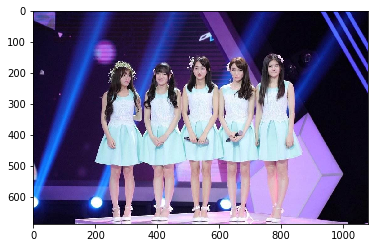

In [6]:
# imgsequence = 2000
# datas[keyss[imgsequence]]['img_paths']
path = 'sample_image/multiperson.jpg'
oriImg = cv.imread(path)
plt.imshow(oriImg[:, :, [2,1,0]])

In [7]:
def padRightDownCorner(img, stride, padValue):
    h = img.shape[0]
    w = img.shape[1]

    pad = 4 * [None]
    pad[0] = 0 # up
    pad[1] = 0 # left
    pad[2] = 0 if (h%stride==0) else stride - (h % stride) # down
    pad[3] = 0 if (w%stride==0) else stride - (w % stride) # right

    img_padded = img
    pad_up = np.tile(img_padded[0:1,:,:]*0 + padValue, (pad[0], 1, 1))
    img_padded = np.concatenate((pad_up, img_padded), axis=0)
    pad_left = np.tile(img_padded[:,0:1,:]*0 + padValue, (1, pad[1], 1))
    img_padded = np.concatenate((pad_left, img_padded), axis=1)
    pad_down = np.tile(img_padded[-2:-1,:,:]*0 + padValue, (pad[2], 1, 1))
    img_padded = np.concatenate((img_padded, pad_down), axis=0)
    pad_right = np.tile(img_padded[:,-2:-1,:]*0 + padValue, (1, pad[3], 1))
    img_padded = np.concatenate((img_padded, pad_right), axis=1)

    return img_padded, pad

class DataBatch(object):
    def __init__(self, data, label, pad=0):
        self.data = [data]
        self.label = [label]
        self.pad = pad

In [8]:
oriImg.shape

(687, 1080, 3)

In [9]:
imageToTest_padded, pad = padRightDownCorner(oriImg, 8, 128)
imageToTest_padded = cv.resize(imageToTest_padded, (368,368), interpolation=cv.INTER_CUBIC)
oriImg = imageToTest_padded

In [10]:
print type(imageToTest_padded), imageToTest_padded.shape

<type 'numpy.ndarray'> (368, 368, 3)


In [11]:
import mxnet as mx
from mxnet import nd
from mxnet.contrib.ndarray import MultiBoxPrior

transposeImage = np.transpose(np.float32(imageToTest_padded[:,:,:]), (2,0,1))/256 - 0.5
testimage = transposeImage

In [12]:
class DataBatch(object):
    def __init__(self, data, label, pad=0):
        self.data = [data]
        self.label = [label]
        self.pad = pad

In [13]:
posesym = PoseModel_test()

In [14]:
cmodel = mx.mod.Module(symbol=posesym, label_names=[])
cmodel.bind(data_shapes=[('data', (1,3,
                                   testimage.shape[1],testimage.shape[2]))])
cmodel.init_params(arg_params=arg_params, aux_params=aux_params)
onedata = DataBatch(mx.nd.array([testimage[:,:,:]]), 0)
    
cmodel.forward(onedata)
result=cmodel.get_outputs()
heatmap = np.moveaxis(result[1].asnumpy()[0], 0, -1)
heatmap = cv.resize(heatmap, (0,0), fx=8, fy=8, interpolation=cv.INTER_CUBIC)
heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3], :]
heatmap = cv.resize(heatmap, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv.INTER_CUBIC)


In [15]:
heatmap.shape

(368, 368, 19)

In [16]:
# part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, 
#             Lank, Leye, Reye, Lear, Rear, pt19]

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


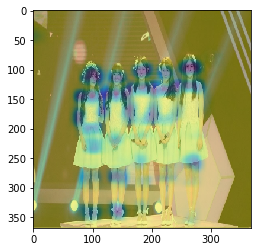

In [17]:
heatmap_avg = heatmap
f = plt.figure()
plt.imshow(oriImg[:,:,[2,1,0]])
ax2 = plt.imshow(heatmap_avg[:,:,18], alpha=.5)
f.show()

In [18]:
paf = np.moveaxis(result[0].asnumpy()[0], 0, -1)
paf = cv.resize(paf, (0,0), fx=8, fy=8, interpolation=cv.INTER_CUBIC)
paf = paf[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3], :]
paf = cv.resize(paf, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv.INTER_CUBIC)

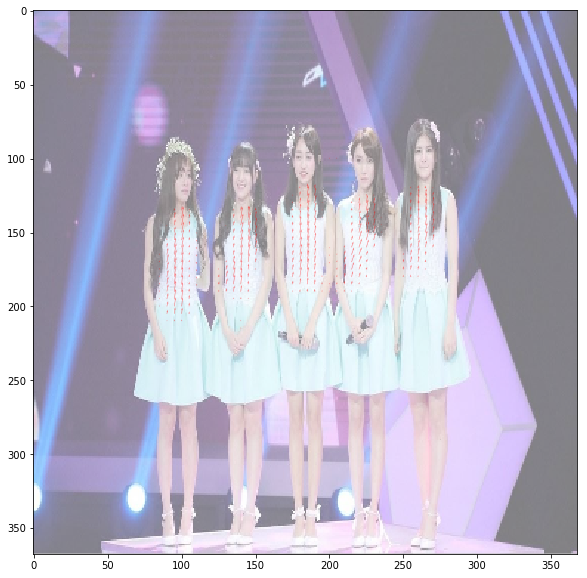

In [19]:
paf_avg = paf
from numpy import ma
U = paf_avg[:,:,0] * -1
V = paf_avg[:,:,1]
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.1 * 0.1] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

# 1
plt.figure()
plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

In [20]:
for i in range(46):
    for j in range(46):
        if heatmap[i,j, 0] == heatmap[:, :, 0].max():
            print i, j

In [21]:
heatmap_avg.shape

(368, 368, 19)

In [22]:
param={}
param['octave'] = 3
param['use_gpu'] = 1
param['starting_range'] = 0.8
param['ending_range'] = 2
param['scale_search'] = [0.5, 1, 1.5, 2]
param['thre1'] = 0.1
param['thre2'] = 0.06
param['thre3'] = 0.4
param['mid_num'] = 4
param['min_num'] = 10
param['crop_ratio'] = 2.5
param['bbox_ratio'] = 0.25
param['GPUdeviceNumber'] = 3

import scipy


#plt.imshow(heatmap_avg[:,:,2])
from scipy.ndimage.filters import gaussian_filter
all_peaks = []
peak_counter = 0

for part in range(19-1):
    x_list = []
    y_list = []
    map_ori = heatmap_avg[:,:,part]
    mapn = gaussian_filter(map_ori, sigma=3)
    #mapn = map_ori
    map_left = np.zeros(mapn.shape)
    map_left[1:,:] = mapn[:-1,:]
    map_right = np.zeros(mapn.shape)
    map_right[:-1,:] = mapn[1:,:]
    map_up = np.zeros(mapn.shape)
    map_up[:,1:] = mapn[:,:-1]
    map_down = np.zeros(mapn.shape)
    map_down[:,:-1] = mapn[:,1:]
    
    peaks_binary = np.logical_and.reduce((mapn>=map_left, mapn>=map_right, mapn>=map_up,
                                          mapn>=map_down, mapn > param['thre1']))
    peaks = zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0]) # note reverse
    peaks_with_score = [x + (map_ori[x[1],x[0]],) for x in peaks]
    id = range(peak_counter, peak_counter + len(peaks))
    peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

    all_peaks.append(peaks_with_score_and_id)
    peak_counter += len(peaks)

In [23]:
all_peaks

[[(263, 99, 1.0722234, 0),
  (182, 105, 0.74738503, 1),
  (221, 108, 0.42245367, 2),
  (106, 113, 0.95102894, 3),
  (141, 115, 0.5898596, 4)],
 [(262, 128, 0.69820678, 5),
  (185, 131, 0.84904486, 6),
  (223, 134, 0.87960589, 7),
  (140, 141, 0.97895658, 8),
  (98, 145, 0.91948247, 9)],
 [(244, 127, 0.75080836, 10),
  (167, 133, 0.78710413, 11),
  (209, 134, 0.68395364, 12),
  (124, 141, 0.97660965, 13),
  (80, 145, 0.88480854, 14)],
 [(164, 167, 0.62551582, 15),
  (204, 167, 0.32609138, 16),
  (121, 168, 0.31956339, 17),
  (76, 180, 0.7067107, 18)],
 [(121, 169, 0.14323266, 19),
  (203, 178, 0.17656766, 20),
  (165, 181, 0.31969044, 21),
  (81, 197, 0.19068231, 22),
  (135, 217, 0.2097415, 23)],
 [(0, 45, 0.13818572, 24),
  (277, 128, 0.76967275, 25),
  (239, 130, 0.59650171, 26),
  (202, 132, 0.85958278, 27),
  (155, 141, 0.8676216, 28),
  (114, 145, 0.86698556, 29)],
 [(159, 165, 0.37123224, 30),
  (115, 169, 0.41468644, 31),
  (200, 171, 0.33835974, 32),
  (239, 177, 0.31826735, 33

plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
plt.plot(304, 75, 'r*')

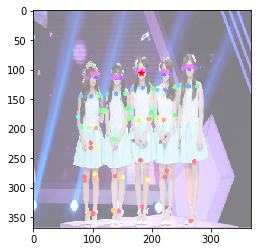

In [46]:
plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
plt.plot(182, 105, 'r*')

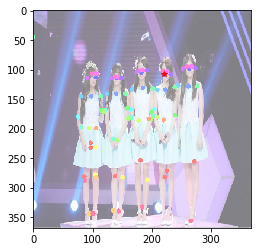

In [48]:
plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
plt.plot(221, 108, 'r*')

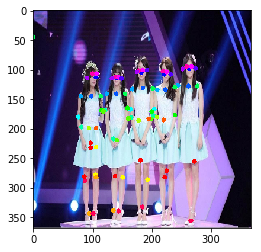

In [25]:
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

cmap = matplotlib.cm.get_cmap('hsv')

canvas = oriImg # B,G,R order

for i in range(18):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(all_peaks[i])):
        cv.circle(canvas, all_peaks[i][j][0:2], 4, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(11, 11)

In [26]:
from generate_anchor import *

allowed_border=0
feat_stride=8
feat_shape = [46, 46]

base_anchors = generate_anchors(base_size=feat_stride, ratios=[1], scales=2 ** np.arange(3, 4))
num_anchors = base_anchors.shape[0]
feat_height, feat_width = feat_shape[-2:]


# 1. generate proposals from bbox deltas and shifted anchors
shift_x = np.arange(0, feat_width) * feat_stride
shift_y = np.arange(0, feat_height) * feat_stride
shift_x, shift_y = np.meshgrid(shift_x, shift_y)
shifts = np.vstack((shift_x.ravel(), shift_y.ravel(), shift_x.ravel(), shift_y.ravel())).transpose()
shifts

# add A anchors (1, A, 4) to
# cell K shifts (K, 1, 4) to get
# shift anchors (K, A, 4)
# reshape to (K*A, 4) shifted anchors
A = num_anchors
K = shifts.shape[0]
all_anchors = base_anchors.reshape((1, A, 4)) + shifts.reshape((1, K, 4)).transpose((1, 0, 2))
all_anchors = all_anchors.reshape((K * A, 4))
total_anchors = int(K * A)

In [27]:
all_anchors

array([[ -28.,  -28.,   35.,   35.],
       [ -20.,  -28.,   43.,   35.],
       [ -12.,  -28.,   51.,   35.],
       ..., 
       [ 316.,  332.,  379.,  395.],
       [ 324.,  332.,  387.,  395.],
       [ 332.,  332.,  395.,  395.]])

In [28]:
loc = result[2]

In [29]:
loc.shape

(1L, 4L, 46L, 46L)

In [30]:
originalboxes = np.transpose(loc, [0, 2, 3, 1])
originalboxes.shape

(1L, 46L, 46L, 4L)

In [31]:
boxdelta = originalboxes.reshape((-1, 4))
boxdelta.shape

(2116L, 4L)

In [32]:
newboxes = all_anchors.reshape((-1, 4))
newboxes.shape

(2116, 4)

In [33]:
type(boxdelta), type(newboxes)

(mxnet.ndarray.ndarray.NDArray, numpy.ndarray)

bbox_pred?

In [38]:
predictboxes = bbox_pred(newboxes, boxdelta.asnumpy())
print predictboxes.shape

(2116, 4)


In [39]:
k = predictboxes.reshape(46,46,4)

In [40]:
k.shape

(46, 46, 4)

In [41]:
newk = k[:, :, :]
newk.shape

(46, 46, 4)

In [42]:
y = 99/8
x = 263/8
# 182, 148
# 773, 185

In [43]:
(x,y)

(32, 12)

In [44]:
newk[y, x, :]

array([ 229.77543306,   78.91294861,  289.40605593,  314.63583374])

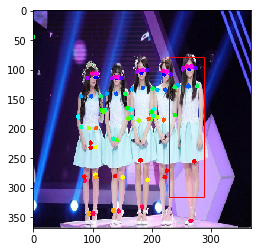

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(oriImg[:, :, [2, 1, 0]])

# Create a Rectangle patch
rect = patches.Rectangle(
    (newk[y, x, 0], newk[y, x, 1]), newk[y, x, 2]-newk[y, x, 0], newk[y, x, 3]-newk[y, x, 1],
    linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

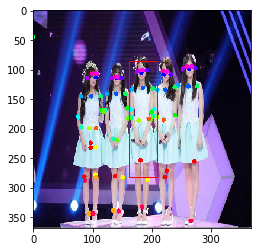

In [47]:
y = 105/8
x = 182/8
# 182, 148

# (x,y)
newk[y,x, :]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(oriImg[:, :, [2, 1, 0]])

# Create a Rectangle patch
rect = patches.Rectangle(
    (newk[y, x, 0], newk[y, x, 1]), newk[y, x, 2]-newk[y, x, 0], newk[y, x, 3]-newk[y, x, 1],
    linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

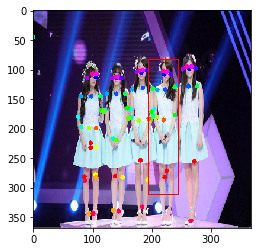

In [49]:
y = 107/8
x = 221/8
# 182, 148


(x,y)

newk[y,x, :]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(oriImg[:, :, [2, 1, 0]])

# Create a Rectangle patch
rect = patches.Rectangle(
    (newk[y, x, 0], newk[y, x, 1]), newk[y, x, 2]-newk[y, x, 0], newk[y, x, 3]-newk[y, x, 1],
    linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [ ]:
### training error

In [ ]:
335.902165636 332.639678531 324.574368876

In [ ]:
if 1:
    # find connection in the specified sequence, center 29 is in the position 15
    limbSeq = newslist
    # the middle joints heatmap correpondence
    mapIdx = mapid

    connection_all = []
    special_k = []
    special_non_zero_index = []
    mid_num = 11

    for k in range(len(mapIdx)):
        
        score_mid = paf_avg[:,:,[x-1 for x in mapIdx[k]]]
        candA = all_peaks[limbSeq[k][0]-1]
        candB = all_peaks[limbSeq[k][1]-1]
        # print(k)
        # print(candA)
        # print('---------')
        # print(candB)
        # print limbSeq[k][0], limbSeq[k][1]
        nA = len(candA)
        nB = len(candB)
        indexA, indexB = limbSeq[k]
        if(nA != 0 and nB != 0):
            connection_candidate = []
            for i in range(nA):
                for j in range(nB):
                    vec = np.subtract(candB[j][:2], candA[i][:2])
                    # print('vec: ',vec)
                    norm = math.sqrt(vec[0]*vec[0] + vec[1]*vec[1])
                    # print('norm: ', norm)
                    vec = np.divide(vec, norm)
                    # print('normalized vec: ', vec)
                    startend = zip(np.linspace(candA[i][0], candB[j][0], num=mid_num), \
                                   np.linspace(candA[i][1], candB[j][1], num=mid_num))
                    # print('startend: ', startend)
                    vec_x = np.array([score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 0] \
                                      for I in range(len(startend))])
                    # print('vec_x: ', vec_x)
                    vec_y = np.array([score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 1] \
                                      for I in range(len(startend))])
                    # print('vec_y: ', vec_y)
                    score_midpts = np.multiply(vec_x, vec[0]) + np.multiply(vec_y, vec[1])
                    # print(score_midpts)
                    # print('score_midpts: ', score_midpts)
                    score_with_dist_prior = sum(score_midpts)/len(score_midpts) + min(0.5*cimage.shape[0]/norm-1, 0)

                    # print('score_with_dist_prior: ', score_with_dist_prior)
                    criterion1 = len(np.nonzero(score_midpts > param['thre2'])[0]) > 0.5 * len(score_midpts)
                    # print('score_midpts > param["thre2"]: ', len(np.nonzero(score_midpts > param['thre2'])[0]))
                    criterion2 = score_with_dist_prior > 0

                    '''
                    if k==1 or k==2:
                        criterion2 = score_with_dist_prior > 1
                    if k == 2:
                        print '-----------', i, j
                        print criterion1
                        print criterion2
                        print score_with_dist_prior
                        print score_midpts
                    '''
                    if criterion1 and criterion2:
                        # print('match')
                        # print(i, j, score_with_dist_prior, score_with_dist_prior+candA[i][2]+candB[j][2])
                        connection_candidate.append([i, j, score_with_dist_prior, score_with_dist_prior+candA[i][2]+candB[j][2]])
                    # print('--------end-----------')
            connection_candidate = sorted(connection_candidate, key=lambda x: x[2], reverse=True)
            # print('-------------connection_candidate---------------')
            # print(connection_candidate)
            # print('------------------------------------------------')
            connection = np.zeros((0,5))
            for c in range(len(connection_candidate)):
                i,j,s = connection_candidate[c][0:3]
                if(i not in connection[:,3] and j not in connection[:,4]):
                    connection = np.vstack([connection, [candA[i][3], candB[j][3], s, i, j]])
                    # print('----------connection-----------')
                    # print(connection)
                    # print('-------------------------------')
                    if(len(connection) >= min(nA, nB)):
                        break

            connection_all.append(connection)
        elif(nA != 0 or nB != 0):
            #print 'k: ', special_k
            special_k.append(k)
            special_non_zero_index.append(indexA if nA != 0 else indexB)
            connection_all.append([])

    #print connection_all
    # last number in each row is the total parts number of that person
    # the second last number in each row is the score of the overall configuration
    subset = -1 * np.ones((0, 16))

    candidate = np.array([item for sublist in all_peaks for item in sublist])

    # print len(connection_all)
    # print len(mapIdx)
    print 'special_k:', special_k
    for k in range(len(mapIdx)):
        if k not in special_k:
            
            try:
                partAs = connection_all[k][:,0]
                partBs = connection_all[k][:,1]
                indexA, indexB = np.array(limbSeq[k]) - 1

                for i in range(len(connection_all[k])): #= 1:size(temp,1)
                    
                    found = 0
                    subset_idx = [-1, -1]
                    for j in range(len(subset)): #1:size(subset,1):
                        if subset[j][indexA] == partAs[i] or subset[j][indexB] == partBs[i]:
                            subset_idx[found] = j
                            found += 1

                    if found == 1:
                        j = subset_idx[0]
                        if k==2:
                            print 'j ', j
                        if(subset[j][indexB] != partBs[i]):#subset[j][indexB] != partBs[i]):
                            if k==2:
                                print 'j ', j
                            subset[j][indexB] = partBs[i]
                            subset[j][-1] += 1
                            subset[j][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]
                    elif found == 2: # if found 2 and disjoint, merge them
                        j1, j2 = subset_idx
                        print "found = 2"
                        membership = ((subset[j1]>=0).astype(int) + (subset[j2]>=0).astype(int))[:-2]
                        if len(np.nonzero(membership == 2)[0]) == 0: #merge
                            subset[j1][:-2] += (subset[j2][:-2] + 1)
                            subset[j1][-2:] += subset[j2][-2:]
                            subset[j1][-2] += connection_all[k][i][2]
                            subset = np.delete(subset, j2, 0)
                        else: # as like found == 1
                            subset[j1][indexB] = partBs[i]
                            subset[j1][-1] += 1
                            subset[j1][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]

                    # if find no partA in the subset, create a new subset
                    elif not found and k < 13:
                        row = -1 * np.ones(16)
                        row[indexA] = partAs[i]
                        row[indexB] = partBs[i]
                        row[-1] = 2
                        row[-2] = sum(candidate[connection_all[k][i,:2].astype(int), 2]) + connection_all[k][i][2]
                        subset = np.vstack([subset, row])
                    if k==2:
                        print 'k ', found
            except:
                print k
            
    # delete some rows of subset which has few parts occur
    deleteIdx = [];
    
    #for i in range(len(subset)):
    #    if subset[i][-1] < 3 or subset[i][-2]/subset[i][-1] < 0.2:
    #        deleteIdx.append(i)
    subset = np.delete(subset, deleteIdx, axis=0)

    #print candidate
    #print subset


In [ ]:
# visualize 2
stickwidth = 4

for i in range(13):
    for n in range(len(subset)):
        index = subset[n][np.array(limbSeq[i])-1]
        if -1 in index:
            continue
        cur_canvas = canvas.copy()
        Y = candidate[index.astype(int), 0]
        X = candidate[index.astype(int), 1]
        mX = np.mean(X)
        mY = np.mean(Y)
        length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
        angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
        polygon = cv.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
        cv.fillConvexPoly(cur_canvas, polygon, colors[i])
        canvas = cv.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
        
plt.imshow(canvas[:, :, [2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)